In [1]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [3]:
def create_dataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels
    

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = create_dataframe(TRAIN_DIR)


angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = create_dataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [12]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [13]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

TypeError: load_img() got an unexpected keyword argument 'grayscale'

In [10]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [11]:
x_train = train_features/255.0
x_test = test_features/255.0

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [14]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])                       

In [15]:
y_train = to_categorical(y_train, num_classes = 7)
y_test = to_categorical(y_test, num_classes = 7)

In [16]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0,4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0,4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0,4))

model.add(Flatten())



model.add(Dense(512, activation='relu'))
model.add(Dropout(0,4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0,3))

#output layer
model.add(Dense(7, activation='softmax'))



In [17]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

In [18]:
model.fit(x = x_train, y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100
226/226 [==============================] - 984s 4s/step - loss: 1.7307 - accuracy: 0.2949 - val_loss: 1.5614 - val_accuracy: 0.3845
Epoch 2/100
226/226 [==============================] - 912s 4s/step - loss: 1.4454 - accuracy: 0.4396 - val_loss: 1.3486 - val_accuracy: 0.4843
Epoch 3/100
  3/226 [..............................] - ETA: 14:04 - loss: 1.2517 - accuracy: 0.5469

KeyboardInterrupt: 

In [ ]:
model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [19]:
from tensorflow.keras.models import model_from_json

In [20]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [21]:
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [22]:
def ef(image):
    img = load_img(image, grayscale=True)
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [23]:
# 1. testing for angry sample

image = 'images/train/angry/22.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of angry


C:\Users\bsumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 231ms/step
model prediction is  angry


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of disgust
1/1 [==============================] - 0s 49ms/step
model prediction is  angry


C:\Users\bsumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


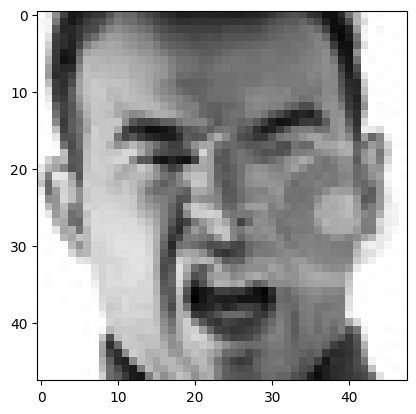

In [25]:
image = 'images/train/disgust/826.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48,48), cmap='gray')

original image is of fear
1/1 [==============================] - 0s 40ms/step
model prediction is  fear


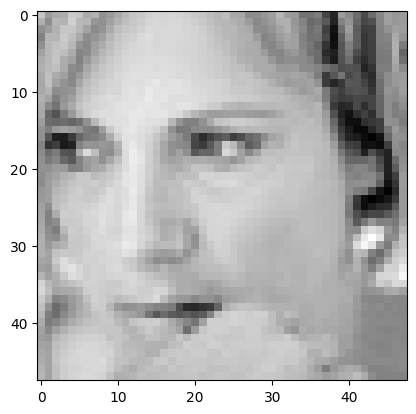

In [26]:
image = 'images/train/fear/48.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48,48), cmap='gray')

In [27]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array
label_mapping = {
    0: 'angry',
    1: 'disgust',
    2: 'fear',
    3: 'happy',
    4: 'neutral',
    5: 'sad',
    6: 'surprise'
}


In [28]:
def predict_emotion(model, image_path, label_mapping):
    img = load_img(image_path, grayscale=True, target_size=(48, 48))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    prediction = model.predict(img_array)
    predicted_label = label_mapping[np.argmax(prediction)]

    return predicted_label

In [29]:
user_image_path = 'D:\\MCA_215\\happy.jpeg'
predicted_emotion = predict_emotion(model, 'D:\MCA_215\happy.jpeg', label_mapping)

print(f"The predicted emotion for the user's image is: {predicted_emotion}")


1/1 [==============================] - 0s 20ms/step
The predicted emotion for the user's image is: sad
